**Chapter 14 – Deep Computer Vision Using Convolutional Neural Networks**

❗️ **This will be very slow, unless you are using a GPU**

❗️ **If you do not, then you should run this notebook in Colab, using a GPU runtime**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Exercises/07_deep_computer_vision_with_cnns.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

Due date: 2022-03-28

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"07_deep_computer_vision_with_cnns_Stallman_Torvalds.pdf".

Submission via blackboard (UA) or Google Form (see notion, LPC).

Feel free to answer free text questions in text cells using markdown and possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended for you to try to understand every line of code.   
Big blocks of code are usually meant to just be clicked through.**

In [1]:
group_name = "LPC Group2"
names = ["Mariana Soeiro", "Thales Oliveira"]

# Setup

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")

import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

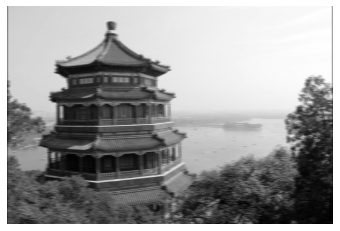

In [4]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255.     # (427, 640, 3) 
flower = load_sample_image("flower.jpg") / 255.   # (427, 640, 3)
images = np.array([china, flower])                # (2, 427, 640, 3)
batch_size, height, width, channels = images.shape

# batch_size = 2
# height = 427
# width = 640
# channels = 3

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) # (7, 7, 3, 2)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") # TensorShape([2, 427, 640, 2])

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

In [5]:
def crop(images):
    return images[150:220, 130:250] ## height, width

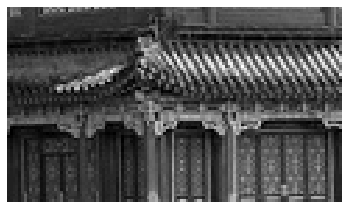

In [6]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

# Basics: Filters and Pooling

## Task 1: Filters

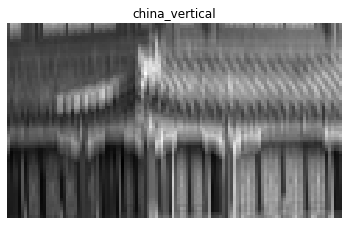

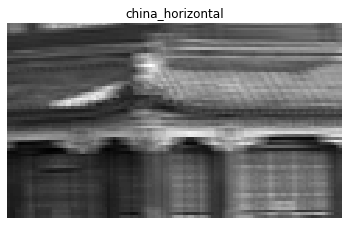

In [7]:
for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.title(filename)
    plt.show()

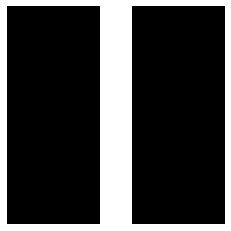

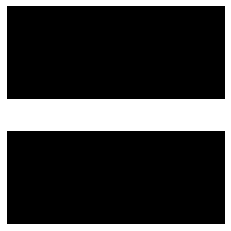

In [8]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

**Task 1 a)**: Describe how the filters work and what their purpose in a CNN is.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below



```
# This is formatted as code
```

**Task 1 a) answer: The filters works with the attribution of 0 and 1 values to features of the dataset, which will multiply the inputs.

This operation allows the CNN to receive only a specific set of features, or in the case of a image, just a specific part of it. 

During the training the CNN will be able to find the most useful filters for its task, and it learns to combine it into more complex patterns. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Convolutional Layer in Keras

To create a 2D convolutional use `keras.layers.Conv2D()` (https://keras.io/api/layers/convolution_layers/convolution2d/), To create a 2D convulutional layer with 32 filters, kernel size of 3, 1 stride, padding=same and RELU activation. 


**Task 1 b)**    
Create a convolutional layer with 2 filters and `kernel_size` `(3,3)`.
Apply it to `images[0:1]` and explain the shape of the output.

You can plot the resulting images if you want (for example `plot_image(new_images[0,:,:,0])`).

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [9]:
conv_layer = keras.layers.Conv2D(filters=2, kernel_size=[3,3], padding='same', activation='relu', input_shape=outputs.shape)

In [10]:
conv_image = conv_layer(images[0:1])

In [11]:
images[0:1].shape

(1, 427, 640, 3)

In [12]:

conv_image.shape ## (1, 427, 640, 3) -> (1, 427, 640, 2)
# The application of the convolutional layer results in a output with one channel less than the original image. 
# Since it has two filters applied, there will be only two output feature maps in each input image.

TensorShape([1, 427, 640, 2])

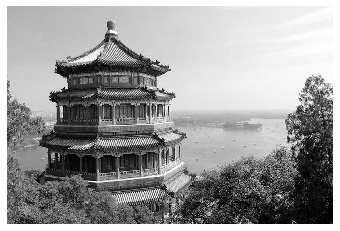

In [13]:
plot_image(images[0,:,:,0])

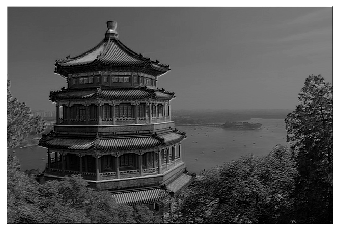

In [14]:
plot_image(conv_image[0,:,:,0])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Cropping the Images

In [15]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)

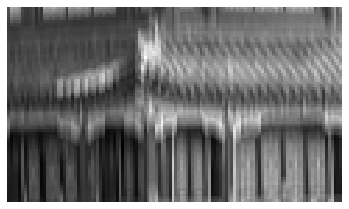

In [16]:
plot_image(crop(outputs[0, :, :, 0]))
plt.show()

## Task 2: Max Pooling Layer in Keras

Pooling layers are used to shrink the input image in order to reduce the computational load, the memory usage, and the number of parameters. 

**Task 2 a)** 
- Crop each image in `images` using `crop(...)`
- Create a max pool layer of pool_size=2 (https://keras.io/api/layers/pooling_layers/max_pooling2d/)
- apply the max pool layer to the `cropped_images` assigning the result to the variable `output`


↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [47]:
cropped_image_china = crop(images[0, :, :, :])



In [48]:
cropped_image_flower = crop(images[1, :, :, :])

In [60]:
max_pool_layer = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")

In [61]:
cropped_images = np.array([cropped_image_china, cropped_image_flower])  

In [62]:
cropped_images.shape

(2, 70, 120, 3)

In [63]:
output = max_pool_layer(cropped_images) ## (2, 70, 120, 3) --> TensorShape([2, 35, 60, 3])

In [64]:
output.shape

TensorShape([2, 35, 60, 3])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

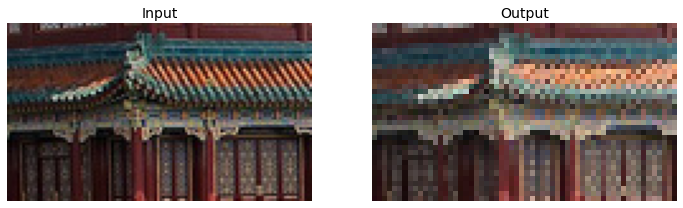

In [52]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

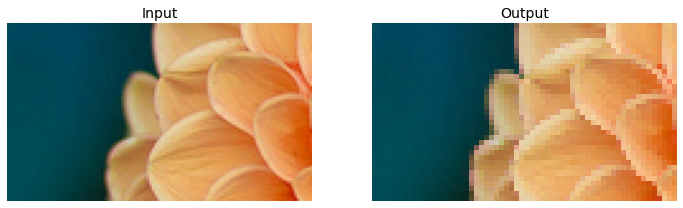

In [54]:

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[1])
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[1])
ax2.axis("off")
plt.show()

**Task 2 b)**

Describe the effect of the max pooling layer. What are its benefits for a Neural Network?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below



```
# This is formatted as code`
```

Task 2b) answer: The MaxPoolingLayer reduces the height and width of the input image by a specific factor. This operation allows the NN to reduce the computational load and time, the memory usage, and the number of parameters of the NN, which can reduce the risk of overfitting. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Tackling Fashion MNIST With a CNN

In [65]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# normalization
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4431872/4422102 [==============================] - 0s 0us/step


In [66]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),   # output layer, multiclass classification
])

### Visualization of Model Structure
This is not necessary, but maybe interesting.

In [67]:
pip install visualkeras

     |████████████████████████████████| 992 kB 31.7 MB/s 


In [68]:
import visualkeras

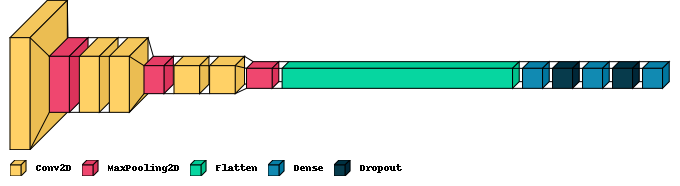

In [69]:
visualkeras.layered_view(model, legend=True)

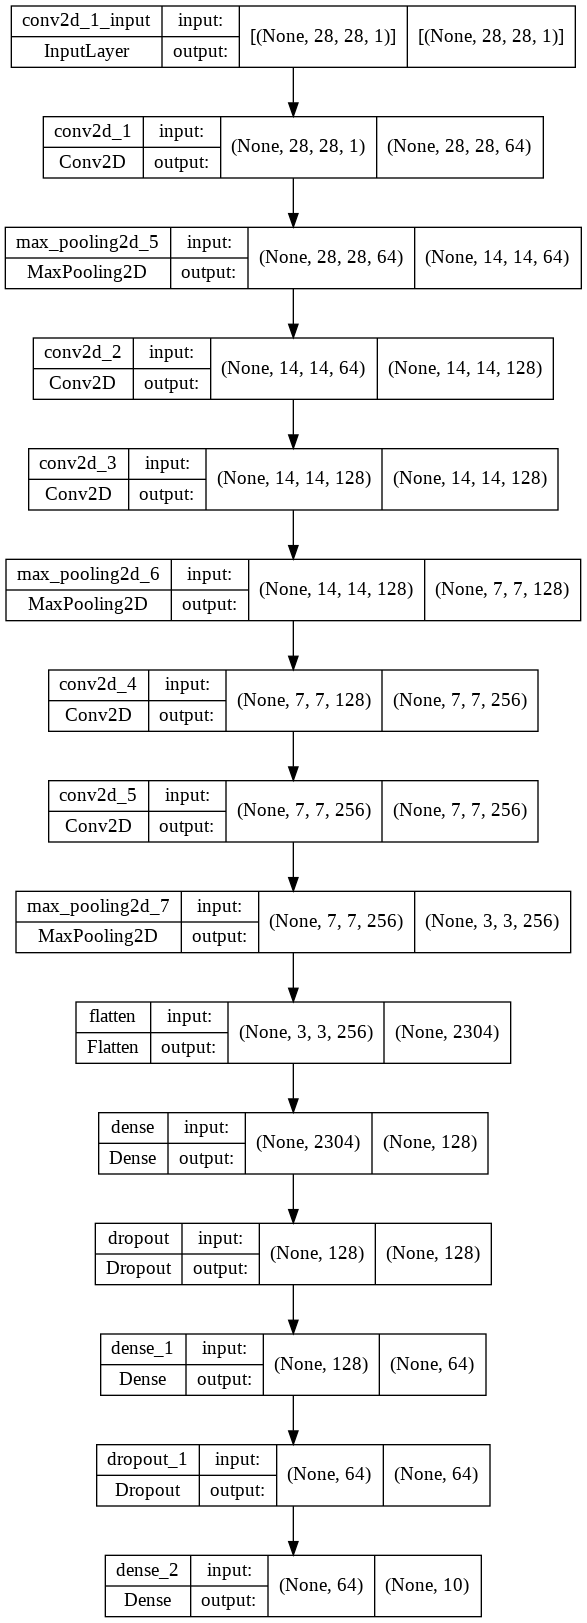

In [70]:
keras.utils.plot_model(model, show_shapes=True)   # does not need visual keras

## Task 3: 
- Compile the model using `"sparse_categorical_crossentropy"` as `loss`, `"nadam"` as optimizer and `["accuracy"]` for `metrics`
- fit the model for 10 epochs using `[X_valid, y_vald]` as validation data
- `evaluate` the model on `X_test, y_test`
- predict the first 10 instances of `X_test` and compare them to `y_test`

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [71]:
optimizer = keras.optimizers.Nadam(learning_rate=1e-3)

In [72]:
# COmpile the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [73]:
# fit the model for 10 epochs using [X_valid, y_vald] as validation data
history = model.fit(X_train, y_train, epochs=10, validation_data=[X_valid, y_valid])

Epoch 1/10
1719/1719 [==============================] - 20s 9ms/step - loss: 0.7067 - accuracy: 0.7530 - val_loss: 0.3715 - val_accuracy: 0.8726
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4184 - accuracy: 0.8601 - val_loss: 0.3129 - val_accuracy: 0.8902
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3644 - accuracy: 0.8766 - val_loss: 0.3179 - val_accuracy: 0.8886
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3350 - accuracy: 0.8880 - val_loss: 0.2846 - val_accuracy: 0.8972
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3114 - accuracy: 0.8944 - val_loss: 0.2739 - val_accuracy: 0.9052
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2962 - accuracy: 0.8996 - val_loss: 0.2780 - val_accuracy: 0.9002
Epoch 7/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.2847 - accuracy: 0.9048 - val_loss: 0.2898 - val_ac

In [74]:
# evaluate the model on X_test, y_test
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3012 - accuracy: 0.8991


[0.3011922538280487, 0.8991000056266785]

In [89]:
# predict the first 10 instances of X_test 
y_pred = np.argmax(model.predict(X_test[:10]), axis=1)

In [91]:
# compare them to y_test
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [92]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 4: ResNet-34

In [93]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [94]:
resnet = keras.models.Sequential()
resnet.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[28,28,1]))
resnet.add(keras.layers.BatchNormalization())
resnet.add(keras.layers.Activation("relu"))
resnet.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    resnet.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
resnet.add(keras.layers.GlobalAvgPool2D())
resnet.add(keras.layers.Flatten())
resnet.add(keras.layers.Dense(10, activation="softmax"))

In [96]:
#keras.utils.plot_model(resnet)

In [97]:
resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        3136      
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 residual_unit (ResidualUnit  (None, 7, 7, 64)         74240     
 )                                                               
                                                      

**Task 4:**   
a) Compile the ResNet-34 model with ADAM optimizer and train 10 for epochs   
b) Compare the performance the results with the ones from Task 3.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [98]:
# ADAM optimizer
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

# Model
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# next, fit the model to the training set
history = model.fit(X_train, y_train, epochs=10, validation_data=[X_valid, y_valid])
# evaluate the model on the test set
model.evaluate(X_test, y_test)

Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 0.2544 - accuracy: 0.9154 - val_loss: 0.3708 - val_accuracy: 0.8994
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2449 - accuracy: 0.9182 - val_loss: 0.3443 - val_accuracy: 0.8854
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2519 - accuracy: 0.9169 - val_loss: 0.3026 - val_accuracy: 0.9054
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2354 - accuracy: 0.9213 - val_loss: 0.3112 - val_accuracy: 0.9016
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2375 - accuracy: 0.9204 - val_loss: 0.3106 - val_accuracy: 0.9034
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2268 - accuracy: 0.9234 - val_loss: 0.3400 - val_accuracy: 0.8974
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2347 - accuracy: 0.9221 - val_loss: 0.3023 - val_ac

[0.33601632714271545, 0.9014999866485596]

 b) Compare the performance the results with the ones from Task 3.

The ResNet model gave a slighty better accuracy with a smaller time to train in the same 10 epochs, in comparison with the model of task 3. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 5: Pretrained Models for Transfer Learning

In this section we use the [tf_flowers](https://www.tensorflow.org/datasets/catalog/tf_flowers) dataset.

We reuse a pretrained [Xception model](https://towardsdatascience.com/review-xception-with-depthwise-separable-convolution-better-than-inception-v3-image-dc967dd42568) to classify pictures of flowers. During the first train the weights of the pretrained layers are frozen, while for the second train are not frozen.

In [ ]:
pip install tensorflow_datasets

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

In [ ]:
info.splits

In [ ]:
class_names = info.features["label"].names
class_names

In [ ]:
n_classes = info.features["label"].num_classes

In [ ]:
dataset_size = info.splits["train"].num_examples
dataset_size

**Warning:** TFDS's split API has evolved since the book was published. The [new split API](https://www.tensorflow.org/datasets/splits) (called S3) is much simpler to use:

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

In [ ]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

In [ ]:
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg    = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model  = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
#keras.utils.plot_model(model)

In [ ]:
# base_model not trainable

for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

In [ ]:
# base_model trainable

for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in test_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

**Task 5:**
- Task 5a) Explain transfer learning and its benefits
- Task 5b) Compare the two trainings above (with/without base model trainable). What is the difference and which one performs better here?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 5a) answer:

Task 5b) answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

# Task 6: High Accuracy CNN for MNIST
Build your own CNN and try to achieve the highest possible accuracy on MNIST.
A basic structure is given below, play around with it.

The following model uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It reaches about 99.2% accuracy on the test set. This places this model roughly in the top 20% in the [MNIST Kaggle competition](https://www.kaggle.com/c/digit-recognizer/) (if we ignore the models with an accuracy greater than 99.79% which were most likely trained on the test set, as explained by Chris Deotte in [this post](https://www.kaggle.com/c/digit-recognizer/discussion/61480)). 

In order to reach an accuracy higher than 99.5% on the test set you might try:

a) batch normalization layers (https://keras.io/api/layers/normalization_layers/batch_normalization/)   
b) set a learning scheduler (Check Chapter 11)   
c) add image augmentation (Check Chapter 14)   
d) create an ensemble (Check Chapter 14)   
e) use hyperparameter tuning, e.g. with [keras tuner](https://www.tensorflow.org/tutorials/keras/keras_tuner) (Hyperband seems to work quite well) 

As long as you implement at least **two** of the above you will get full points on this one. 